In [1]:
import os, sys
sys.path.insert(1, "/".join(os.path.abspath('').split("/")[:-1]))

from transformers import AutoTokenizer
from tokenizers.processors import TemplateProcessing

from data.sequence_modelling_dataset import TextGenerationDataset
from data.classification_dataset import TextClassificationDataset
from data.image_generation_dataset import ImageGenerationDataset

/Users/cezarygolecki/projects/magisterka/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## CIFAR10

In [2]:
cifar10 = ImageGenerationDataset("cifar10", "train", os.path.abspath("") + "/../datastorage/cifar10")

torch.Size([3, 32, 32])


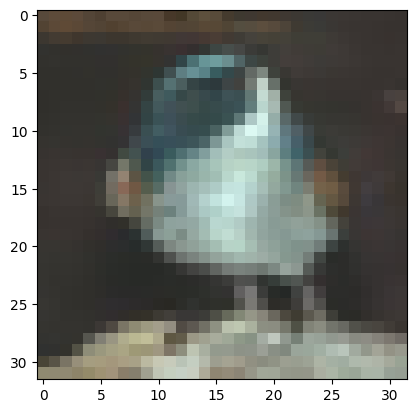

In [3]:
cifar10.show_random_img()


## ENWIK8

In [2]:
tokenizer = AutoTokenizer.from_pretrained("google/byt5-small")
enwik8 = TextGenerationDataset(dataset_name="enwik8", 
                               tokenizer=tokenizer, 
                               max_length=512,
                               cache_dir=os.path.abspath("") + "/../datastorage/enwik8/",
                               prepare_dataset=False)

/Users/cezarygolecki/projects/magisterka/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
print(len(enwik8))
print(tokenizer.vocab_size)

90000000
256


In [6]:
enwik8.prepare_dataset()

## IMDB

In [2]:
from transformers import GPT2TokenizerFast

SPECIAL_TOKENS_DICT = {
    "eos_token": "[EOS]",
    "bos_token": "[BOS]",
    "unk_token": "[UNK]",
    "sep_token": "[SEP]",
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "mask_token": "[MASK]",
}
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
tokenizer.add_special_tokens(SPECIAL_TOKENS_DICT)
tokenizer._tokenizer.post_processor = TemplateProcessing(
    single=tokenizer.bos_token + " $A " + tokenizer.eos_token,
    special_tokens=[(tokenizer.eos_token, tokenizer.eos_token_id), (tokenizer.bos_token, tokenizer.bos_token_id)],
)

max_length = 512

print(tokenizer.all_special_tokens)

['[BOS]', '[EOS]', '[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']


/Users/cezarygolecki/projects/magisterka/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
imdb = TextClassificationDataset("imdb", 
                                tokenizer=tokenizer, 
                                max_length=max_length, 
                                cache_dir=os.path.abspath("") + "/../datastorage/imdb")
print(imdb[0][0])

tensor([50258,  8496,   284,  2221,    11,   612,   338,   523,   881,  2642,
          290, 12361,   546,   428,  3807,   314,   716,   407,  1654,   810,
          284,   923,    13, 16805,    11,   262,   734,  3995,   519,   274,
          508,  2630,   428, 15671,  2848,    13,  7212,  3469,   290, 17853,
        44348,    11,   717,   484,  3521,   470,   787,   510,   511,   523,
           12,  7174,  9017,   329,   257,  1438,    13,  2011,  4724,   484,
         6626,   262,  3580,    11,   326,   338,  1521,   262,  1388,  3670,
          318, 39947,  1268, 14603,   370, 24010,    45,     6,    51,   360,
        10008,    11,   475,   262,   886,  3159,  1139, 39837, 14603,   370,
        24010,    45,     6,    51,   360, 10008,    13, 16126,   530,  4206,
         1997,   546,   262,  8366,  7573,    13,  2293,   477, 28274,  1011,
        17865,    82,   284,   366,  4598,   645,  4419,  1911, 25536,   257,
         2415,   329,   257,  1182, 23319,   561,   307,  3177, 

In [5]:
tokenizer.decode(imdb[1][0])

"[BOS]I think this is almost all I need to say. I feel obliged to explain my actions though. I've basically never seen such an armateur production, and I mean that in all senses of the word. Although the physical camera work, boom MIC operation and other technical aspects of this film are laughable, unfortunately its not the only areas.<br /><br />Unlike some classic independent films that have been saved by their scripts great characterization and plot, this unfortunately has an awful script, awful acting and worst of all, awful annoying characters.<br /><br />It's a crime that for the every independent film that gets, distribution like Haiku Tunnel, there's a 101 other indie films that died silent deaths. I don't know who the Kornbluth brothers know at Sony, but that can be my only explanation as to how this amateur family production ever got distribution. I'm quite bemused as to why they picked this up.<br /><br />The ONLY part of this film that holds out any intrigue is its title. 

## Wikitext103

In [ ]:
from transformers import GPT2TokenizerFast

SPECIAL_TOKENS_DICT = {
    "eos_token": "[EOS]",
    "bos_token": "[BOS]",
    "unk_token": "[UNK]",
    "sep_token": "[SEP]",
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "mask_token": "[MASK]",
}
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
tokenizer.add_special_tokens(SPECIAL_TOKENS_DICT)
tokenizer._tokenizer.post_processor = TemplateProcessing(
    single=tokenizer.bos_token + " $A " + tokenizer.eos_token,
    special_tokens=[(tokenizer.eos_token, tokenizer.eos_token_id), (tokenizer.bos_token, tokenizer.bos_token_id)],
)

max_length = 512

print(tokenizer.all_special_tokens)

In [ ]:
wiki = TextGenerationDataset(dataset_name='wikipedia', 
                                split='train', 
                                tokenizer=tokenizer,
                                max_length=max_length,
                                cache_dir=os.path.abspath("") + "/../datastorage/wikipedia")

wiki.data[0]

'= Valkyria Chronicles III =\nSenjō no Valkyria 3: Unrecorded Chronicles (Japanese: 戦場のヴァルキュリア3, lit. Valkyria of the Battlefield 3), commonly referred to as Valkyria Chronicles III outside Japan, is a tactical role-playing video game developed by Sega and Media.Vision for the PlayStation Portable. Released in January 2011 in Japan, it is the third game in the Valkyria series. Employing the same fusion of tactical and real-time gameplay as its predecessors, the story runs parallel to the first game and follows the "Nameless", a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit "Calamaty Raven".\nThe game began development in 2010, carrying over a large portion of the work done on Valkyria Chronicles II. While it retained the standard features of the series, it also underwent multiple adjustments, such as making the game more forgiving for series newcomers. Character designer Raita 

In [ ]:
tokenized_sentences = wiki.tokenize()
lengths = [len(sentence) for sentence in tokenized_sentences]
print("Number of sentences: ", len(tokenized_sentences))
print("Max length: ", max(lengths))
print("Min length: ", min(lengths))
print("Avg length: ", sum(lengths)/len(lengths))
print("Sum of lengths: ", sum(lengths))

Token indices sequence length is longer than the specified maximum sequence length for this model (4342 > 1024). Running this sequence through the model will result in indexing errors


Number of sentences:  29567
Max length:  29395
Min length:  7
Avg length:  3836.058443535022
Sum of lengths:  113420740


In [ ]:
sliced_sentences = wiki.slice_sentences()
lengths = [len(sentence) for sentence in sliced_sentences]
print("Number of sentences: ", len(sliced_sentences))
print("Max length: ", max(lengths))
print("Min length: ", min(lengths))
print("Avg length: ", sum(lengths)/len(lengths))
print("Sum of lengths: ", sum(lengths))
print("Number of available pad tokens: ", len(sliced_sentences)*max_length - sum(lengths))
print("Sum of lengths after padding: ", len(sliced_sentences)*max_length - sum(lengths) + sum(lengths))

Number of sentences:  236055
Max length:  513
Min length:  1
Avg length:  480.48437864057104
Sum of lengths:  113420740
Number of available pad tokens:  7439420
Sum of lengths after padding:  120860160


In [ ]:
padded_sentences = wiki.pad_sentences()
lengths = [len(sentence) for sentence in padded_sentences]
print("Number of sentences: ", len(padded_sentences))
print("Max length: ", max(lengths))
print("Min length: ", min(lengths))
print("Avg length: ", sum(lengths)/len(lengths))
print("Sum of lengths: ", sum(lengths))

Number of sentences:  236055
Max length:  513
Min length:  513
Avg length:  513.0
Sum of lengths:  121096215
